## Description

## Loading the useful dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("D:/UN jobs application/Code samples/Python/raw_data/FAO_grains_NA.csv")

### Exploring the dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      1501 non-null   object 
 1   Crop         1501 non-null   object 
 2   Information  1501 non-null   object 
 3   Year         1501 non-null   int64  
 4   Value        1501 non-null   float64
 5   Source       1501 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 70.5+ KB



#### Descriptive stats for Continuous Variables using PANDAS

###### description of a single variable

In [3]:
pd.DataFrame(df["Value"].describe())

,Value
count,1.501000e+03
mean,1.622720e+06
std,5.159003e+06
min,0.000000e+00
25%,1.955144e+04
50%,4.713079e+04
75%,5.580700e+05
max,3.540000e+07


##### Histogram

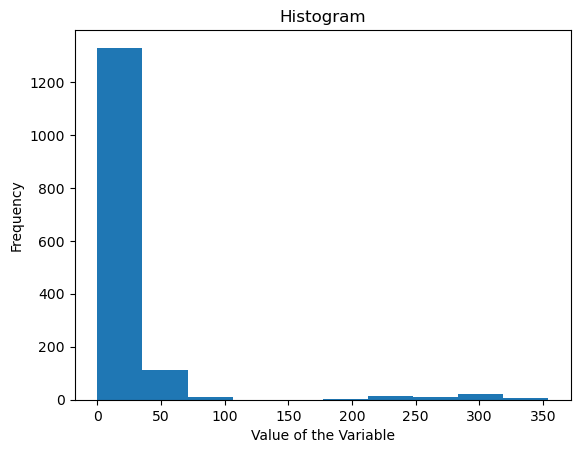

In [4]:
plt.hist(df["Value"]/100000)
# graph customization
plt.title('Histogram')  # Set the title of the plot
plt.xlabel('Value of the Variable')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Display the plot

###### Boxplot 

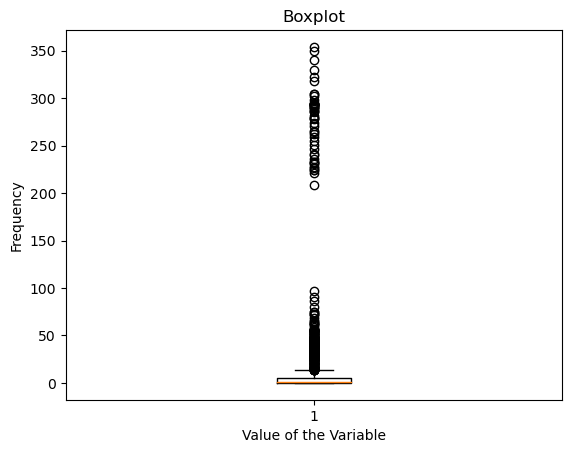

In [5]:
plt.boxplot(df["Value"]/100000)
# graph customization
plt.title('Boxplot')  # Set the title of the plot
plt.xlabel('Value of the Variable')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Display the plot

#### Descriptive stats for Categorical Variables using PANDAS

##### general description

In [6]:
df['Crop'].describe()

count       1501
unique        11
top       Barley
freq         208
Name: Crop, dtype: object

##### Simple table

In [7]:
pd.DataFrame(df['Country'].value_counts(normalize=True,ascending=False))

,Country
United States of America,0.513658
Canada,0.486342


##### Cross table with values

In [8]:
pd.DataFrame(pd.crosstab(df['Crop'],df['Country'], margins=True, margins_name="Total"))

Country,Canada,United States of America,Total
Crop,,,
Barley,104,104,208
Buckwheat,96,104,200
Canary seed,66,0,66
"Grain, mixed",104,0,104
Maize,104,104,208
Millet,0,104,104
Oats,104,104,208
Popcorn,0,43,43
Rye,104,104,208


##### Cross table with frequencies

###### Total frequencies

In [9]:
pd.DataFrame(pd.crosstab(df['Crop'],df['Country'],margins=True,normalize=True, margins_name="Total"))

Country,Canada,United States of America,Total
Crop,,,
Barley,0.069287,0.069287,0.138574
Buckwheat,0.063957,0.069287,0.133245
Canary seed,0.043971,0.000000,0.043971
"Grain, mixed",0.069287,0.000000,0.069287
Maize,0.069287,0.069287,0.138574
Millet,0.000000,0.069287,0.069287
Oats,0.069287,0.069287,0.138574
Popcorn,0.000000,0.028648,0.028648
Rye,0.069287,0.069287,0.138574


###### Frequencies  by column

In [10]:
pd.DataFrame(pd.crosstab(df['Crop'],df['Country'], margins=True,normalize="columns", margins_name="Total"))

Country,Canada,United States of America,Total
Crop,,,
Barley,0.142466,0.134890,0.138574
Buckwheat,0.131507,0.134890,0.133245
Canary seed,0.090411,0.000000,0.043971
"Grain, mixed",0.142466,0.000000,0.069287
Maize,0.142466,0.134890,0.138574
Millet,0.000000,0.134890,0.069287
Oats,0.142466,0.134890,0.138574
Popcorn,0.000000,0.055772,0.028648
Rye,0.142466,0.134890,0.138574


###### Frequencies  by row

In [11]:
pd.DataFrame(pd.crosstab(df['Crop'],df['Country'], margins=True,normalize="index", margins_name="Total"))

Country,Canada,United States of America
Crop,,
Barley,0.500000,0.500000
Buckwheat,0.480000,0.520000
Canary seed,1.000000,0.000000
"Grain, mixed",1.000000,0.000000
Maize,0.500000,0.500000
Millet,0.000000,1.000000
Oats,0.500000,0.500000
Popcorn,0.000000,1.000000
Rye,0.500000,0.500000


###### Grouped cross table

In [12]:
#Group by country
pd.crosstab(df['Crop'],[df['Country'],df['Source']], margins=True, margins_name="Total")

Country               Canada                                           \
Source       Calculated data FAO data based on imputation methodology   
Crop                                                                    
Barley                    52                                        0   
Buckwheat                 47                                        0   
Canary seed               33                                        0   
Grain, mixed              52                                        0   
Maize                     52                                        0   
Millet                     0                                        0   
Oats                      52                                        0   
Popcorn                    0                                        0   
Rye                       52                                        0   
Sorghum                    0                                        0   
Triticale                 24                                        1   
Total                    364                                        1   

Country                                 United States of America  \
Source       FAO estimate Official data          Calculated data   
Crop                                                               
Barley                  0            52                       52   
Buckwheat               2            47                       52   
Canary seed             6            27                        0   
Grain, mixed            0            52                        0   
Maize                   0            52                       52   
Millet                  0             0                       52   
Oats                    0            52                       52   
Popcorn                 0             0                       21   
Rye                     0            52                       52   
Sorghum                 0             0                       52   
Triticale               1            22                        0   
Total                   9           356                      385   

Country                                                             \
Source       FAO data based on imputation methodology FAO estimate   
Crop                                                                 
Barley                                              0            0   
Buckwheat                                          10           35   
Canary seed                                         0            0   
Grain, mixed                                        0            0   
Maize                                               0            0   
Millet                                              6           28   
Oats                                                0            0   
Popcorn                                             0            1   
Rye                                                 0            0   
Sorghum                                             0            0   
Triticale                                           0            0   
Total                                              16           64   

Country                    Total  
Source       Official data        
Crop                              
Barley                  52   208  
Buckwheat                7   200  
Canary seed              0    66  
Grain, mixed             0   104  
Maize                   52   208  
Millet                  18   104  
Oats                    52   208  
Popcorn                 21    43  
Rye                     52   208  
Sorghum                 52   104  
Triticale                0    48  
Total                  306  1501

###### Cross table with aggragated values

In [13]:
pd.crosstab(df['Crop'], df['Country'], values=df['Value'], aggfunc='mean', margins=True, margins_name="Total").round(0)

Country,Canada,United States of America,Total
Crop,,,
Barley,1995406.0,1550325.0,1772866.0
Buckwheat,18171.0,32564.0,25656.0
Canary seed,71598.0,NaN,71598.0
"Grain, mixed",216669.0,NaN,216669.0
Maize,472260.0,13806734.0,7139497.0
Millet,NaN,68521.0,68521.0
Oats,952646.0,1747402.0,1350024.0
Popcorn,NaN,48477.0,48477.0
Rye,131524.0,152421.0,141972.0


###### Visualizing a cross table

<Axes: xlabel='Country', ylabel='Crop'>

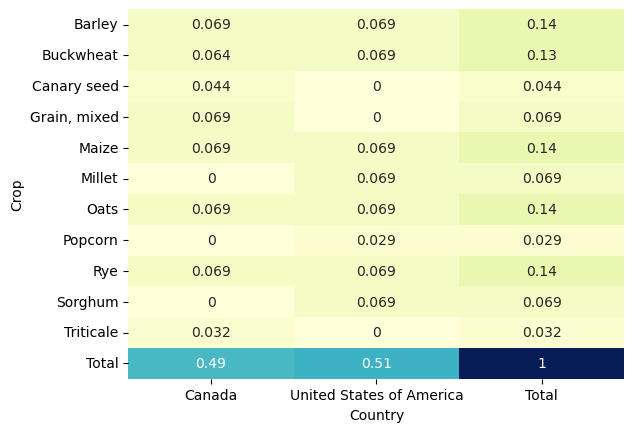

In [14]:
sns.heatmap(pd.crosstab(df['Crop'],df['Country'],margins=True,normalize=True, margins_name="Total"),
            cmap="YlGnBu", annot=True, cbar=False)